[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shambhuphysics/GenerativeAI/blob/main/C2P2/C2P2.1_Ngram_analysis.ipynb)



---

## 🎵 **Building a Language Model Using Histogram N-Gram Analysis**
💡 **Goal:** Learn how to build and analyze a language model that can **generate pop song lyrics** using **histogram N-gram analysis** with **NLTK**.

---

### 🔍 **Project Overview**

This project introduces the fundamentals of **language modeling** through the fun and creative task of **pop lyric generation**.
You’ll build **N-gram models** (Unigram, Bigram, and Trigram) using **NLTK** to:

* Examine how often words and word combinations appear.
* Discover **patterns and repetitions** typical of pop music.
* Understand the **structure and flow of language** in lyrics.

By mastering these concepts, you’ll gain a solid foundation for **advanced NLP (Natural Language Processing)** applications such as text generation, chatbots, and predictive typing.

---

### 🎯 **Learning Objectives**

By the end of this lab, you will be able to:

* ⚙️ **Implement histogram N-gram models** using NLTK.
* 📊 **Analyze word frequencies** and distributions in text.
* 💬 **Interpret linguistic patterns** that define pop songs.

---

### 🧩 **Project Steps**

1. **Setup & Preparation**

   * Install and import all required libraries.
   * Define helper functions for text processing.

2. **Language Modeling Workflow**

   * 🔠 **Tokenization:** Break text into words or tokens.
   * 1️⃣ **Unigram Model:** Analyze individual word frequencies.
   * 2️⃣ **Bigram Model:** Study pairs of consecutive words.
   * 3️⃣ **Trigram Model:** Explore three-word sequences for richer context.

---

### 🧰 **Required Libraries**

Before you begin, make sure these libraries are installed and imported:

* 🐼 **pandas** → Data handling and manipulation
* 🔢 **numpy** → Mathematical operations
* 🤖 **sklearn** → Machine learning utilities
* 🎨 **seaborn** → Data visualization
* 📈 **matplotlib** → Plotting and graphing tools

---

### 🚀 **Outcome**

After completing this project, you’ll:

* Understand how **N-gram models** capture linguistic structure.
* Be able to **analyze and generate text patterns** programmatically.
* Possess a strong starting point for **further NLP exploration** and creative text-based projects.

---



<div style="text-align:center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0WSVEN/song%20%281%29.png" alt="Image Description">
</div>



- **Scikit-learn**:  
  - The standard machine learning library in Python, offering algorithms for classification, regression, clustering, dimensionality reduction, and tools for model training, validation, and evaluation.[6][8]

- **NLTK (Natural Language Toolkit)**:  
  - Comprehensive toolkit for natural language processing tasks, including text tokenization, stemming, linguistic data analysis, and building language models required for NLP projects.[8]

- **Torch (PyTorch)**:  
  - Widely used deep learning framework for building and training neural networks, supporting GPU acceleration, dynamic computational graphs, and integration with other scientific libraries.[8]

- **Torchtext**:  
  - Utility library for PyTorch focused on preprocessing, loading, and managing text datasets for NLP models, enabling efficient workflow integration for sequence modeling tasks.[8]

- **Torchvision**:  
  - Provides image datasets, transformation utilities, and pretrained models for computer vision tasks within PyTorch projects, simplifying workflow for image classification, detection, and augmentation.[8]

- **Scipy**:  
  - Extends NumPy with advanced mathematical, optimization, and scientific routines (e.g., integration, signal processing), critical for computational research and engineering analyses.[8]



In [ ]:
#install required library
!pip install -q numpy pandas matplotlib seaborn scikit-learn
!pip install nltk
!pip install torch
!pip install torchtext
!pip install torchvision
!pip install --upgrade --force-reinstall scipy scikit-learn

  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cusparse_cu12-12.5.8.93-py3-n

In [ ]:
# Suppress all warnings to prevent output clutter during execution
import warnings
warnings.simplefilter('ignore')
warnings.warn = lambda *args, **kwargs: None
warnings.filterwarnings('ignore')

# Standard library imports for general utility and text processing
import re  # Regular expressions for pattern matching in text processing
import string  # Provides string constants and common string operations
import time  # Time functions, useful for delays and measuring performance
from collections import OrderedDict  # Dictionary that remembers insertion order

# Third-party imports for data science, visualization, and NLP
import matplotlib.pyplot as plt  # Plotting library to create static and interactive charts

import nltk  # Natural Language Toolkit, essential for text tokenization and linguistic analysis

import numpy as np  # Core numerical computing package with multidimensional arrays

import pandas as pd  # Data structures and analysis tools for tabular and time series data

import seaborn as sns

from sklearn.manifold import TSNE
# Dimensionality reduction method, helps visualize high-dimensional data

from tqdm import tqdm  # Progress bar utility to track execution of loops

# Download essential NLTK language models for tokenization capabilities
nltk.download('punkt')
nltk.download('punkt_tab')

# PyTorch imports for deep learning model definition and training
import torch  # Core library for tensor computations and autograd support

import torch.nn as nn  # Neural network building blocks like layers and loss functions

import torch.nn.functional as F  # Functional API for activation functions and other ops

import torch.optim as optim  # Optimizers to update model parameters during training


[nltk_data] Downloading package punkt to /home/ucfbsbh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ucfbsbh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import re

def preprocess_string(s):
    s = re.sub(r"[^\w\s]", '', s)  # Remove punctuation and special characters
    s = re.sub(r"\s+", '', s)      # Remove all spaces, tabs, newlines
    s = re.sub(r"\d", '', s)       # Remove digits
    return s

# Example usage
input_text = "Hello, world! This is 2025."
clean_text = preprocess_string(input_text)
print(clean_text)  # Output: "HelloworldThisis"


HelloworldThisis




## 🧠 **Language Modeling**

### 🌍 **What Is Language Modeling?**

Language modeling is a **core concept in Natural Language Processing (NLP)** and **Artificial Intelligence (AI)**.
It focuses on **predicting the probability of word sequences** — essentially helping computers understand how words naturally flow in human language.

---

### 📊 **How It Works**

* Language models use **statistical methods** to learn patterns, structures, and relationships between words.
* By studying large text corpora, the model learns **which words are likely to appear together** and **in what order**.
* The goal is to estimate the **likelihood of a sentence or phrase**, making it sound grammatically and contextually correct.

---

### ⚙️ **Why It’s Important**

Language models are the foundation for many modern NLP applications, including:

* ✍️ **Text Generation** – creating new sentences or lyrics.
* 🌐 **Machine Translation** – converting text between languages.
* 🗣️ **Speech Recognition** – understanding spoken words.
* 💬 **Sentiment Analysis** – detecting emotions and opinions in text.
* 🤖 **Chatbots & Virtual Assistants** – generating human-like responses.

---

### 🎵 **Example Application**

To make this concept more engaging, you’ll explore language modeling using lyrics from
**“Never Gonna Give You Up” by Rick Astley (1987)** — a classic pop hit.
You’ll experiment with predicting or generating new lyrics **based on a given word or phrase**, revealing how models capture and replicate linguistic patterns found in real songs.

---

### 🚀 **In Summary**

Language modeling teaches machines to **understand, predict, and generate human language**.
It’s a crucial stepping stone toward creating intelligent systems capable of reading, writing, and communicating naturally.


In [ ]:
song= """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""



---

## 🧰 **Natural Language Toolkit (NLTK)**

### 💡 **Overview**

**NLTK (Natural Language Toolkit)** is a popular **open-source Python library** designed for performing a wide range of **Natural Language Processing (NLP)** tasks.
It provides:

* 🧩 **Tools and algorithms** for text analysis.
* 📚 **Linguistic resources**, such as corpora and lexicons.
* ⚙️ **Functions** for manipulating and processing human language data.

With NLTK, you can easily perform operations like **tokenization**, **stemming**, **tagging**, **parsing**, and **text classification** — making it a go-to library for both beginners and researchers in NLP.

---

## ✂️ **Tokenization**

### 🔍 **What Is Tokenization?**

**Tokenization** is a fundamental NLP process that involves **splitting text into smaller units called tokens**.
These tokens can be:

* 📝 **Words**
* 📖 **Phrases**
* 🧾 **Sentences**
* 🔡 **Individual characters**

The choice depends on how detailed (granular) your text analysis needs to be.

---

### 🧠 **Focus in This Project**

For this project, you’ll use **Word Tokenization**, which:

* Treats **each word** as a separate token.
* Splits text based on **spaces and punctuation marks**.
* Helps analyze word frequencies and structures in lyrics or other text data.

---

### ⚙️ **Implementation Details**

To perform tokenization, you will use the **`word_tokenize()`** function from NLTK.
During this process, you will:

* 🔤 **Convert all text to lowercase** (remove capitalization).
* ❌ **Remove punctuation and symbols** to clean the data.
* ✅ **Extract clean word tokens** ready for analysis.

---

### 🚀 **Why It Matters**

Tokenization is the **first and most crucial step** in NLP.
It transforms raw text into a structured format that computers can **analyze, count, and model**, forming the foundation for advanced techniques like **language modeling**, **sentiment analysis**, and **text generation**.


In [ ]:
from nltk.tokenize import word_tokenize

def preprocess(words):
    tokens = word_tokenize(words)
    tokens = [preprocess_string(w) for w in tokens]
    return [w.lower() for w in tokens if len(w)!=0 and (w in string.punctuation)]

tokens = preprocess(song)
tokens

[]

Tokenization
Tokenization breaks text into individual words (tokens). This is the first step in text analysis.

Example: "The cat sat" → ["the", "cat", "sat"]

In [ ]:
from nltk.tokenize import word_tokenize

def preprocess(text):
    """Tokenize and clean text"""
    tokens = word_tokenize(text)
    tokens = [preprocess_string(w) for w in tokens]
    return [w.lower() for w in tokens if len(w) > 0]

tokens= preprocess(song)
tokens

['we',
 'are',
 'no',
 'strangers',
 'to',
 'love',
 'you',
 'know',
 'the',
 'rules',
 'and',
 'so',
 'do',
 'i',
 'a',
 'full',
 'commitments',
 'what',
 'im',
 'thinking',
 'of',
 'you',
 'wouldnt',
 'get',
 'this',
 'from',
 'any',
 'other',
 'guy',
 'i',
 'just',
 'wan',
 'na',
 'tell',
 'you',
 'how',
 'im',
 'feeling',
 'got',
 'ta',
 'make',
 'you',
 'understand',
 'never',
 'gon',
 'na',
 'give',
 'you',
 'up',
 'never',
 'gon',
 'na',
 'let',
 'you',
 'down',
 'never',
 'gon',
 'na',
 'run',
 'around',
 'and',
 'desert',
 'you',
 'never',
 'gon',
 'na',
 'make',
 'you',
 'cry',
 'never',
 'gon',
 'na',
 'say',
 'goodbye',
 'never',
 'gon',
 'na',
 'tell',
 'a',
 'lie',
 'and',
 'hurt',
 'you',
 'weve',
 'known',
 'each',
 'other',
 'for',
 'so',
 'long',
 'your',
 'hearts',
 'been',
 'aching',
 'but',
 'youre',
 'too',
 'shy',
 'to',
 'say',
 'it',
 'inside',
 'we',
 'both',
 'know',
 'whats',
 'been',
 'going',
 'on',
 'we',
 'know',
 'the',
 'game',
 'and',
 'were',
 'gon',

# Frequency Distribution

In [ ]:
# create frequency distribution of tokens
fdist = nltk.FreqDist(tokens)
fdist.keys()

dict_keys(['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules', 'and', 'so', 'do', 'i', 'a', 'full', 'commitments', 'what', 'im', 'thinking', 'of', 'wouldnt', 'get', 'this', 'from', 'any', 'other', 'guy', 'just', 'wan', 'na', 'tell', 'how', 'feeling', 'got', 'ta', 'make', 'understand', 'never', 'gon', 'give', 'up', 'let', 'down', 'run', 'around', 'desert', 'cry', 'say', 'goodbye', 'lie', 'hurt', 'weve', 'known', 'each', 'for', 'long', 'your', 'hearts', 'been', 'aching', 'but', 'youre', 'too', 'shy', 'it', 'inside', 'both', 'whats', 'going', 'on', 'game', 'were', 'play', 'if', 'ask', 'me', 'dont', 'blind', 'see'])

In [ ]:
fdist.values()

dict_values([5, 1, 1, 1, 4, 1, 37, 5, 3, 1, 16, 3, 1, 3, 7, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 40, 9, 3, 3, 2, 2, 8, 2, 36, 38, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1])

<BarContainer object of 10 artists>

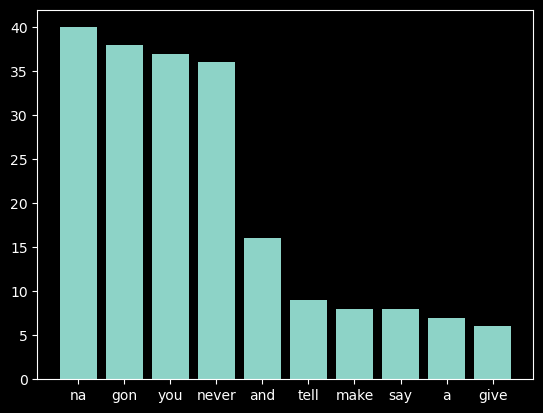

In [ ]:
def plot_dist(fdist):
    words_list = [ word for word, _ in fdist.most_common(10)]
    count_list = [ count for _,count in fdist.most_common(10)]
    return plt.bar(words_list, count_list)

plot_dist(fdist=fdist)

# Unigram Model
 - A unigram Model treats each word indepently and calculates
    ` P(word) = Count(word)/Total_words `

 - Limitation: Unigram ignore context, they predict based only on word frequency, not word order.

In [ ]:
TOTAL_WORDS = sum(fdist.values())

def unigram_prob(word):
    prob = fdist[word]/TOTAL_WORDS
    return prob
for word in fdist.keys():
    print(f" Total words in unigram {TOTAL_WORDS}")
    print(f"Probabilty of '{word}' is {unigram_prob(word)*100:.2f}")

 Total words in unigram 385
Probabilty of 'we' is 1.30
 Total words in unigram 385
Probabilty of 'are' is 0.26
 Total words in unigram 385
Probabilty of 'no' is 0.26
 Total words in unigram 385
Probabilty of 'strangers' is 0.26
 Total words in unigram 385
Probabilty of 'to' is 1.04
 Total words in unigram 385
Probabilty of 'love' is 0.26
 Total words in unigram 385
Probabilty of 'you' is 9.61
 Total words in unigram 385
Probabilty of 'know' is 1.30
 Total words in unigram 385
Probabilty of 'the' is 0.78
 Total words in unigram 385
Probabilty of 'rules' is 0.26
 Total words in unigram 385
Probabilty of 'and' is 4.16
 Total words in unigram 385
Probabilty of 'so' is 0.78
 Total words in unigram 385
Probabilty of 'do' is 0.26
 Total words in unigram 385
Probabilty of 'i' is 0.78
 Total words in unigram 385
Probabilty of 'a' is 1.82
 Total words in unigram 385
Probabilty of 'full' is 0.26
 Total words in unigram 385
Probabilty of 'commitments' is 0.26
 Total words in unigram 385
Probabilty

<BarContainer object of 10 artists>

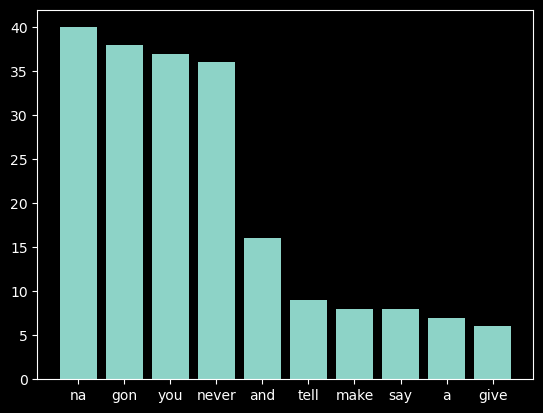

In [ ]:
freq_unigram = fdist
plot_dist(freq_unigram)

# Bigram Model
 - A bigram model considers pairs of consecutive words and calculates:

   - `P(word2 | word1) = Count(word1,word2)/Count(word1)`

 - Advantage: Bigrams caputre simple context by considering the previous word

### Create Biagram

In [ ]:
# Create Bigram
bigrams = list(nltk.bigrams(tokens))

# Display first 5 bigrams:
print(bigrams[0:5])

# Create Frequency Distribution
freq_biagrams = nltk.FreqDist(bigrams)
print(f"Total unique bigram = {len(freq_biagrams)}")

[('we', 'are'), ('are', 'no'), ('no', 'strangers'), ('strangers', 'to'), ('to', 'love')]
Total unique bigram = 119


In [ ]:
def df_grams_plot(freq_grams = freq_biagrams):
    df_bigram = pd.DataFrame.from_dict(dict(zip (freq_grams.keys(), freq_grams.values())), orient='index')
    df_bigram.columns = ['Count']
    df_bigram = df_bigram.sort_values(by='Count', ascending=False)
    plot = df_bigram.head(10).plot(kind='bar')
    return plot

<Axes: >

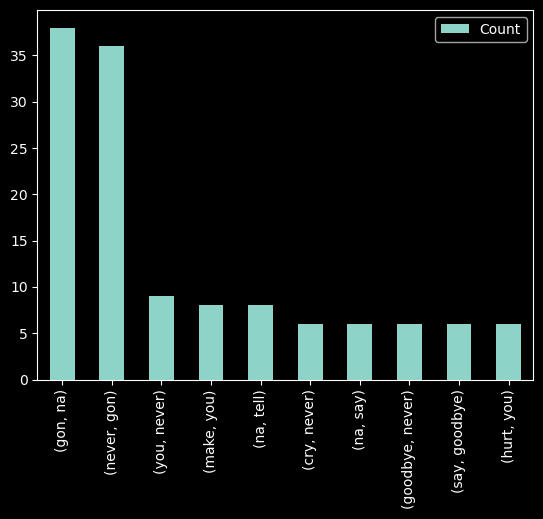

In [ ]:
df_grams_plot(freq_grams=freq_biagrams)

### Calculate Probability


In [ ]:
def bigrams_prob(word1,word2):
    bigrams_count = freq_biagrams[(word1,word2)]
    word1_count = fdist[word1]
    bigrams_prob = bigrams_count/word1_count
    if word1_count == 0:
       return 0
    return bigrams_prob

for bigram in freq_biagrams.keys():
    print(f"The probability of {bigram}: {bigrams_prob(bigram[0], bigram[1])}")

The probability of ('we', 'are'): 0.2
The probability of ('are', 'no'): 1.0
The probability of ('no', 'strangers'): 1.0
The probability of ('strangers', 'to'): 1.0
The probability of ('to', 'love'): 0.25
The probability of ('love', 'you'): 1.0
The probability of ('you', 'know'): 0.02702702702702703
The probability of ('know', 'the'): 0.6
The probability of ('the', 'rules'): 0.3333333333333333
The probability of ('rules', 'and'): 1.0
The probability of ('and', 'so'): 0.0625
The probability of ('so', 'do'): 0.3333333333333333
The probability of ('do', 'i'): 1.0
The probability of ('i', 'a'): 0.3333333333333333
The probability of ('a', 'full'): 0.14285714285714285
The probability of ('full', 'commitments'): 1.0
The probability of ('commitments', 'what'): 1.0
The probability of ('what', 'im'): 1.0
The probability of ('im', 'thinking'): 0.25
The probability of ('thinking', 'of'): 1.0
The probability of ('of', 'you'): 1.0
The probability of ('you', 'wouldnt'): 0.02702702702702703
The probabi

### Predict Next Word

In [ ]:
def predict_next_word(word, freq_grams, fdist, vocab):
    prediction ={}
    for next_word in vocab:
        if isinstance(word, str):
           count = freq_grams[(word, next_word)]
           total = fdist[word]
        else: #use Trigram
           count = freq_grams[*word,next_word]
           total = freq_biagrams[word]

        if total>0:
           prediction[next_word] = count/total
    # Sort by Probability
    sorted_preds = sorted(prediction.items(), key=lambda x: x[1], reverse=True)
    return sorted_preds

In [ ]:
vocab = set(tokens)
predict_next_word('the', freq_biagrams, fdist, vocab)

[('game', 0.6666666666666666),
 ('rules', 0.3333333333333333),
 ('hearts', 0.0),
 ('desert', 0.0),
 ('dont', 0.0),
 ('feeling', 0.0),
 ('your', 0.0),
 ('let', 0.0),
 ('what', 0.0),
 ('were', 0.0),
 ('other', 0.0),
 ('gon', 0.0),
 ('inside', 0.0),
 ('no', 0.0),
 ('na', 0.0),
 ('make', 0.0),
 ('for', 0.0),
 ('down', 0.0),
 ('but', 0.0),
 ('this', 0.0),
 ('see', 0.0),
 ('so', 0.0),
 ('blind', 0.0),
 ('commitments', 0.0),
 ('wan', 0.0),
 ('the', 0.0),
 ('tell', 0.0),
 ('any', 0.0),
 ('and', 0.0),
 ('each', 0.0),
 ('give', 0.0),
 ('play', 0.0),
 ('if', 0.0),
 ('a', 0.0),
 ('full', 0.0),
 ('from', 0.0),
 ('too', 0.0),
 ('long', 0.0),
 ('thinking', 0.0),
 ('got', 0.0),
 ('been', 0.0),
 ('goodbye', 0.0),
 ('on', 0.0),
 ('aching', 0.0),
 ('known', 0.0),
 ('never', 0.0),
 ('whats', 0.0),
 ('strangers', 0.0),
 ('are', 0.0),
 ('to', 0.0),
 ('cry', 0.0),
 ('i', 0.0),
 ('ta', 0.0),
 ('love', 0.0),
 ('get', 0.0),
 ('im', 0.0),
 ('up', 0.0),
 ('you', 0.0),
 ('lie', 0.0),
 ('wouldnt', 0.0),
 ('we', 0.0

In [ ]:
freq_biagrams

FreqDist({('gon', 'na'): 38, ('never', 'gon'): 36, ('you', 'never'): 9, ('na', 'tell'): 8, ('make', 'you'): 8, ('na', 'give'): 6, ('give', 'you'): 6, ('you', 'up'): 6, ('up', 'never'): 6, ('na', 'let'): 6, ...})

# Trigram Models
- A trigram model considers triplets of consecutive words:
   - `P(word3| word1,word2) = Count(word1,word2,word3)/Count(word1,word2`)

### Creating Trigrams

<Axes: >

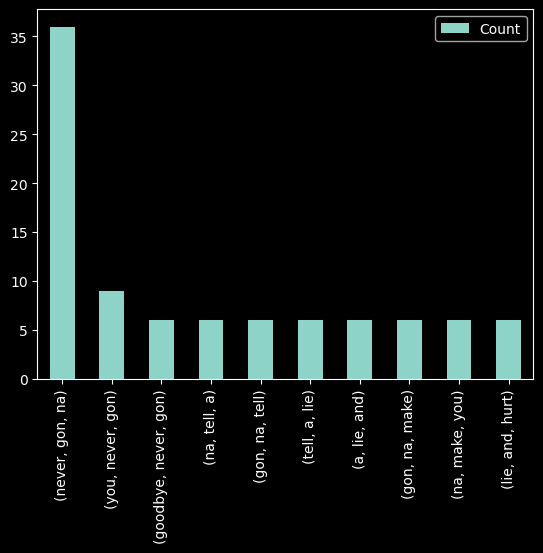

In [ ]:
trigrams = list(nltk.trigrams(tokens))
freq_trigrams = nltk.FreqDist(trigrams)
df_grams_plot(freq_grams=freq_trigrams)

In [ ]:
for key1 in freq_trigrams.keys():
    print(key1)
    break

('we', 'are', 'no')


# Calculate Probabilty;

In [ ]:
freq_biagrams

FreqDist({('gon', 'na'): 38, ('never', 'gon'): 36, ('you', 'never'): 9, ('na', 'tell'): 8, ('make', 'you'): 8, ('na', 'give'): 6, ('give', 'you'): 6, ('you', 'up'): 6, ('up', 'never'): 6, ('na', 'let'): 6, ...})

In [ ]:
trigrams = list(nltk.trigrams(tokens))
freq_trigrams = nltk.FreqDist(trigrams)
bigrams = list(nltk.bigrams(tokens))
freq_bigrams = nltk.FreqDist(bigrams)
def trigrams_prob(word1, word2, word3):
    trigrams_count = freq_trigrams[(word1, word2, word3)]
    bigram_count = freq_bigrams[(word1,word2)]
    if bigram_count == 0:
       return 0
    trigram_prob = trigrams_count/bigram_count
    return trigram_prob

for trigram in freq_trigrams.keys():
    print(f"The probability of {trigram}: {trigrams_prob(trigram[0], trigram[1], trigram[2])}")

The probability of ('we', 'are', 'no'): 1.0
The probability of ('are', 'no', 'strangers'): 1.0
The probability of ('no', 'strangers', 'to'): 1.0
The probability of ('strangers', 'to', 'love'): 1.0
The probability of ('to', 'love', 'you'): 1.0
The probability of ('love', 'you', 'know'): 1.0
The probability of ('you', 'know', 'the'): 1.0
The probability of ('know', 'the', 'rules'): 0.3333333333333333
The probability of ('the', 'rules', 'and'): 1.0
The probability of ('rules', 'and', 'so'): 1.0
The probability of ('and', 'so', 'do'): 1.0
The probability of ('so', 'do', 'i'): 1.0
The probability of ('do', 'i', 'a'): 1.0
The probability of ('i', 'a', 'full'): 1.0
The probability of ('a', 'full', 'commitments'): 1.0
The probability of ('full', 'commitments', 'what'): 1.0
The probability of ('commitments', 'what', 'im'): 1.0
The probability of ('what', 'im', 'thinking'): 1.0
The probability of ('im', 'thinking', 'of'): 1.0
The probability of ('thinking', 'of', 'you'): 1.0
The probability of (

In [ ]:
trigrams = list(nltk.trigrams(tokens))
bigrams = list(nltk.bigrams(tokens))

freq_trigrams = nltk.FreqDist(trigrams)
freq_bigrams = nltk.FreqDist(bigrams)

def trigram_prob(word1, word2, word3):
    trigram_count = freq_trigrams.get((word1, word2, word3), 0)
    bigram_count = freq_bigrams.get((word1, word2), 0)
    if bigram_count == 0:
        return 0
    return trigram_count / bigram_count

for trigram in freq_trigrams.keys():
    print(f"The probability of {trigram}: {trigram_prob(trigram[0], trigram[1], trigram[2])}")


The probability of ('we', 'are', 'no'): 1.0
The probability of ('are', 'no', 'strangers'): 1.0
The probability of ('no', 'strangers', 'to'): 1.0
The probability of ('strangers', 'to', 'love'): 1.0
The probability of ('to', 'love', 'you'): 1.0
The probability of ('love', 'you', 'know'): 1.0
The probability of ('you', 'know', 'the'): 1.0
The probability of ('know', 'the', 'rules'): 0.3333333333333333
The probability of ('the', 'rules', 'and'): 1.0
The probability of ('rules', 'and', 'so'): 1.0
The probability of ('and', 'so', 'do'): 1.0
The probability of ('so', 'do', 'i'): 1.0
The probability of ('do', 'i', 'a'): 1.0
The probability of ('i', 'a', 'full'): 1.0
The probability of ('a', 'full', 'commitments'): 1.0
The probability of ('full', 'commitments', 'what'): 1.0
The probability of ('commitments', 'what', 'im'): 1.0
The probability of ('what', 'im', 'thinking'): 1.0
The probability of ('im', 'thinking', 'of'): 1.0
The probability of ('thinking', 'of', 'you'): 1.0
The probability of (


## 🧠 What we Did

we correctly calculated:
$$
P(\text{word}_3 \mid \text{word}_1, \text{word}_2) = \frac{\text{Count(word1, word2, word3)}}{\text{Count(word1, word2)}}
$$
for each trigram in the song’s tokens.

---

## ⚠️ Why Most Probabilities Are 1.0

Most lines in wer song are *unique sequences* of words.
That means:

* Each **bigram** (e.g., `('we', 'are')`) appears only once.
* Each **trigram** (e.g., `('we', 'are', 'no')`) appears only once too.

So:
$$
\text{Count(('we','are','no'))} = 1 \quad \text{and} \quad \text{Count(('we','are'))} = 1
$$

Hence:
$$
P = 1/1 = 1.0
$$

That’s why almost all probabilities are **1.0** — wer text is *too small* and *too repetitive* to produce rich probability distributions.

---

## 📉 Why Some Probabilities Are < 1

The few lines where the same bigram occurs with **different third words** lead to lower probabilities.
For example:

```
('gon', 'na', 'give')
('gon', 'na', 'let')
('gon', 'na', 'run')
('gon', 'na', 'make')
('gon', 'na', 'say')
('gon', 'na', 'tell')
('gon', 'na', 'play')
```

Here, `('gon', 'na')` appears **many times**, followed by different words.
So, for example:

$$
\text{Count(('gon','na'))} = 19,\quad \text{Count(('gon','na','give'))} = 3
$$

$
P = 3 / 19 = 0.1579
$

✅ **That’s exactly what wer output shows — which is *correct*!**

---

## ✅ So, Is the Output “Correct”?

**Yes — it’s mathematically correct** given wer current data and code.
But it’s not *linguistically meaningful* yet, because:

1. The dataset (one song) is too small.
2. Most word sequences appear only once.
3. There’s no smoothing — unseen combinations get 0 probability.

---

## 🚀 How to Make It More Realistic

To get more *interesting and accurate* probabilities:

1. **Use a larger corpus** (e.g., multiple pop songs).
2. **Apply Laplace (add-one) smoothing** to handle unseen cases:

   ```python
   def trigram_prob_smoothed(w1, w2, w3, alpha=1.0):
       V = len(set(tokens))
       trigram_count = freq_trigrams.get((w1, w2, w3), 0)
       bigram_count = freq_bigrams.get((w1, w2), 0)
       return (trigram_count + alpha) / (bigram_count + alpha * V)
   ```
3. **Normalize and test on unseen text** to measure model quality (e.g., with *perplexity*).
4. **Generate text** with sampling — we’ll see the probabilities shape more believable lyric-like sentences.

---

## 🧾 In Summary

| Observation               | Explanation                                     |
| ------------------------- | ----------------------------------------------- |
| Many 1.0 probabilities    | Each bigram appears only once (unique sequence) |
| Some fractional values    | Same bigram followed by multiple next words     |
| Mathematically correct?   | ✅ Yes                                           |
| Linguistically realistic? | ⚠️ Not yet — dataset too small                  |
| How to fix                | Use larger corpus + smoothing                   |

---




<Axes: >

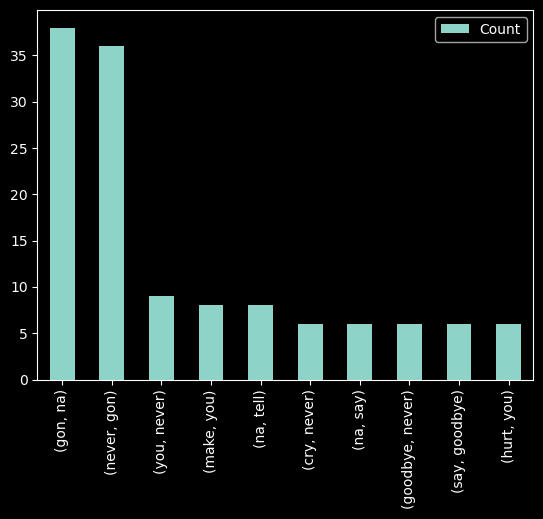

In [ ]:
from nltk.util import ngrams
gram5 = list(ngrams(tokens, 2))
freq_5grams = nltk.FreqDist(gram5)
df_grams_plot(freq_5grams)
